In [55]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import itertools as it
import matplotlib.pyplot as plt
import scipy

In [2]:
f_s_m = pd.read_csv("unzip/FINAL_SEQUENCES_MATRIX.tsv", sep = '\t')

In [3]:
f_s_m

,SESSIONS_SEQUENCES
0,"['68a9902529901882ecd5143460468d4c', '79d75347..."
1,['72b88f72bca2636844bb14b9cd9e29b3']
2,"['b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb..."
3,"['dcb3d50673073d3c023db102f21b2d3e', '09a5d816..."
4,"['3de59e26ee7e94a6ccd0a2eead2fab9a', '4a51f13a..."
...,...
1489571,['af718335cce0487a7d3b1ae64eb58c32']
1489572,['2d94c9bf487950e65f6f999ced39c116']
1489573,['21ab3e195efa4fca5a52a3d9b9eb0253']
1489574,"['f4d6ee901e5217b0f54350ae716451c2', 'f945d74b..."


In [63]:
# функции для отчистики данных

def crop(st):
    return st[1:-1]
def unlist(st):
    return list(map(crop, st[1:-1].split(', ')))
def hash_seq_list(k):
    return list(map(crop, f_s_m.loc[k][0][1:-1].split(', ')))

In [71]:
f_s_m_new = pd.DataFrame(f_s_m['SESSIONS_SEQUENCES'].apply(unlist), columns = ['SESSIONS_SEQUENCES'])

In [ ]:
df_top_1000_hashes = pd.read_csv('top1000hashes.csv', names = ['HASHES', 'COUNT'])['HASHES'].apply(crop)
top_1000_hashes = list(df_top_1000_hashes)

In [91]:
f_s_m_new.loc[0][0]
set_top_1000_hashes = set(top_1000_hashes)
set_top_1000_hashes

{'e841b1dc98f3b54f95c0f496cd2769fb',
 '77c75d63d14949db2dd14aaedd477d75',
 'c1b451ad5cb210c243baba89b168ba05',
 '04fb35af5ff7f43b55d74265d2658fbe',
 '3e8a876c326edd8bd8f6f08e630bc693',
 '5d06df45d194df3f5ec367fc0e4fec73',
 '0a635557172ce7c41c24b287d3586b89',
 '36072357f11ebfe0ee333f82647275df',
 '9ac7bc22f5d597270732405bd18e1260',
 '51451cafbe353800e851b2fad3163a8b',
 '789ef230cca0750a36fc8df7983e9072',
 '4ec9f394b25f1d757422f01fc04cef49',
 'c8d7bf528f37efaa57da66818eb9f4a8',
 'e284617f91e5ecc80a872c394aad164a',
 '696ce2efbb150c1c6a851c3adc3d8aa5',
 '828e617555709596bc3b9f248bbab38b',
 '229faf5da27e27dfacfdfc0a317af123',
 'c29b557abd2fd6b34662852045c67bd3',
 '9412e612bb94f66cba8b3dfe437a809d',
 'f0efb9b2192fdce3fee9f4f6a510f238',
 '9c7b4030022bddb8b3c92b6e00c7431d',
 '14d76b737a43021047355410d2c80420',
 'c2a20652296a2c3c81c94f4319acbc2e',
 'cd9c49a6d6c3c6f23a7e5c2a3a665aa3',
 '9289cbd21dbc12af47d09e4193857d96',
 '7f960958e13d6a5774b00495e84cb9d5',
 'c5ebef865fa22fbc71dee002fa067b87',
 

In [101]:
set_top_1000_hashes = set(top_1000_hashes)
test = f_s_m_new.loc[2][0]
set_test = set(test)
print(set_test)
set_test.intersection_update(set_top_1000_hashes)
print(set_test)
if len(set_test) != 0:
    list_test = list(set_test
    for i in test:
        

{'b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb70cf7f728ccdf162a50817c1', '2c15e8a10c7d06c6ac2afb5f74d3eb0a', '1822269b8c1b62e23a1e9db41d92b429', 'e97dcc62d2c701b37c1f3ab617bf6753'}
{'e97dcc62d2c701b37c1f3ab617bf6753', 'b496d19eb25556bd64e481d11b6f7dd6'}


In [4]:
# Получение списка уникальных хешей

hsl = [hash_seq_list(i) for i in range(f_s_m.shape[0])]
merged = list(it.chain(*hsl))
unic_list = list(set(merged))[1:]

In [107]:
def cm_to_inch(value):
    return value/0.75

In [13]:
range(9)

range(0, 9)

In [34]:
id_matrix_with = pd.read_csv('id_matrix_100_hashes_normalized_division.csv')
id_matrix_no = pd.read_csv('id_matrix_100_hashes_normalized_no_division.csv')

In [77]:
hash_columns = list(id_matrix_with.columns)
id_matrix_with

,eb727f972742f7ff6b07ee761ae5da1b,c82c51bc925071ff17983d79b472c9f8,87a4ccc2101bb6109d397e91e9291624,d08c1bbf135ff7e0c8324fbc890e9916,b496d19eb25556bd64e481d11b6f7dd6,6f50051fef25e2633f4d3073104d7a2c,6ae8abe8c2cf3bcf9cc6df31f4d06d4d,e65bd9b13ec4a97ac7b912f37c3e36d4,9a7670be67a118ddd4b30f5cdd3b035e,007a81eb198c0128bd7a4b276498983c
0,1.000000,0.439266,1.226696,1.246249,0.086668,0.578370,0.358823,0.009433,0.005780,0.127046
1,5.292811,1.000000,0.220877,0.202687,0.182113,2.499444,0.918535,0.068310,0.049930,0.517893
2,3.753475,0.056090,1.000000,0.263874,0.056725,0.064248,0.255491,0.005719,0.003193,0.002873
3,3.742768,0.050519,0.258993,1.000000,0.054852,0.064599,0.254848,0.005568,0.003295,0.002759
4,0.361453,0.063034,0.077316,0.076172,1.000000,0.089291,0.029264,0.374058,0.277567,0.006104
5,4.516843,1.619996,0.163981,0.167983,0.167204,1.000000,0.985309,0.015121,0.012815,0.384815
6,11.625524,2.469838,2.705274,2.749317,0.227337,4.087660,1.000000,0.021470,0.011079,0.482001
7,0.102384,0.061532,0.020285,0.020124,0.973462,0.021014,0.007192,1.000000,1.696413,0.001257
8,0.052514,0.037652,0.009482,0.009970,0.604722,0.014909,0.003107,1.420166,1.000000,0.001283
9,11.991681,4.056961,0.088629,0.086716,0.138151,4.650949,1.404220,0.010931,0.013329,1.000000


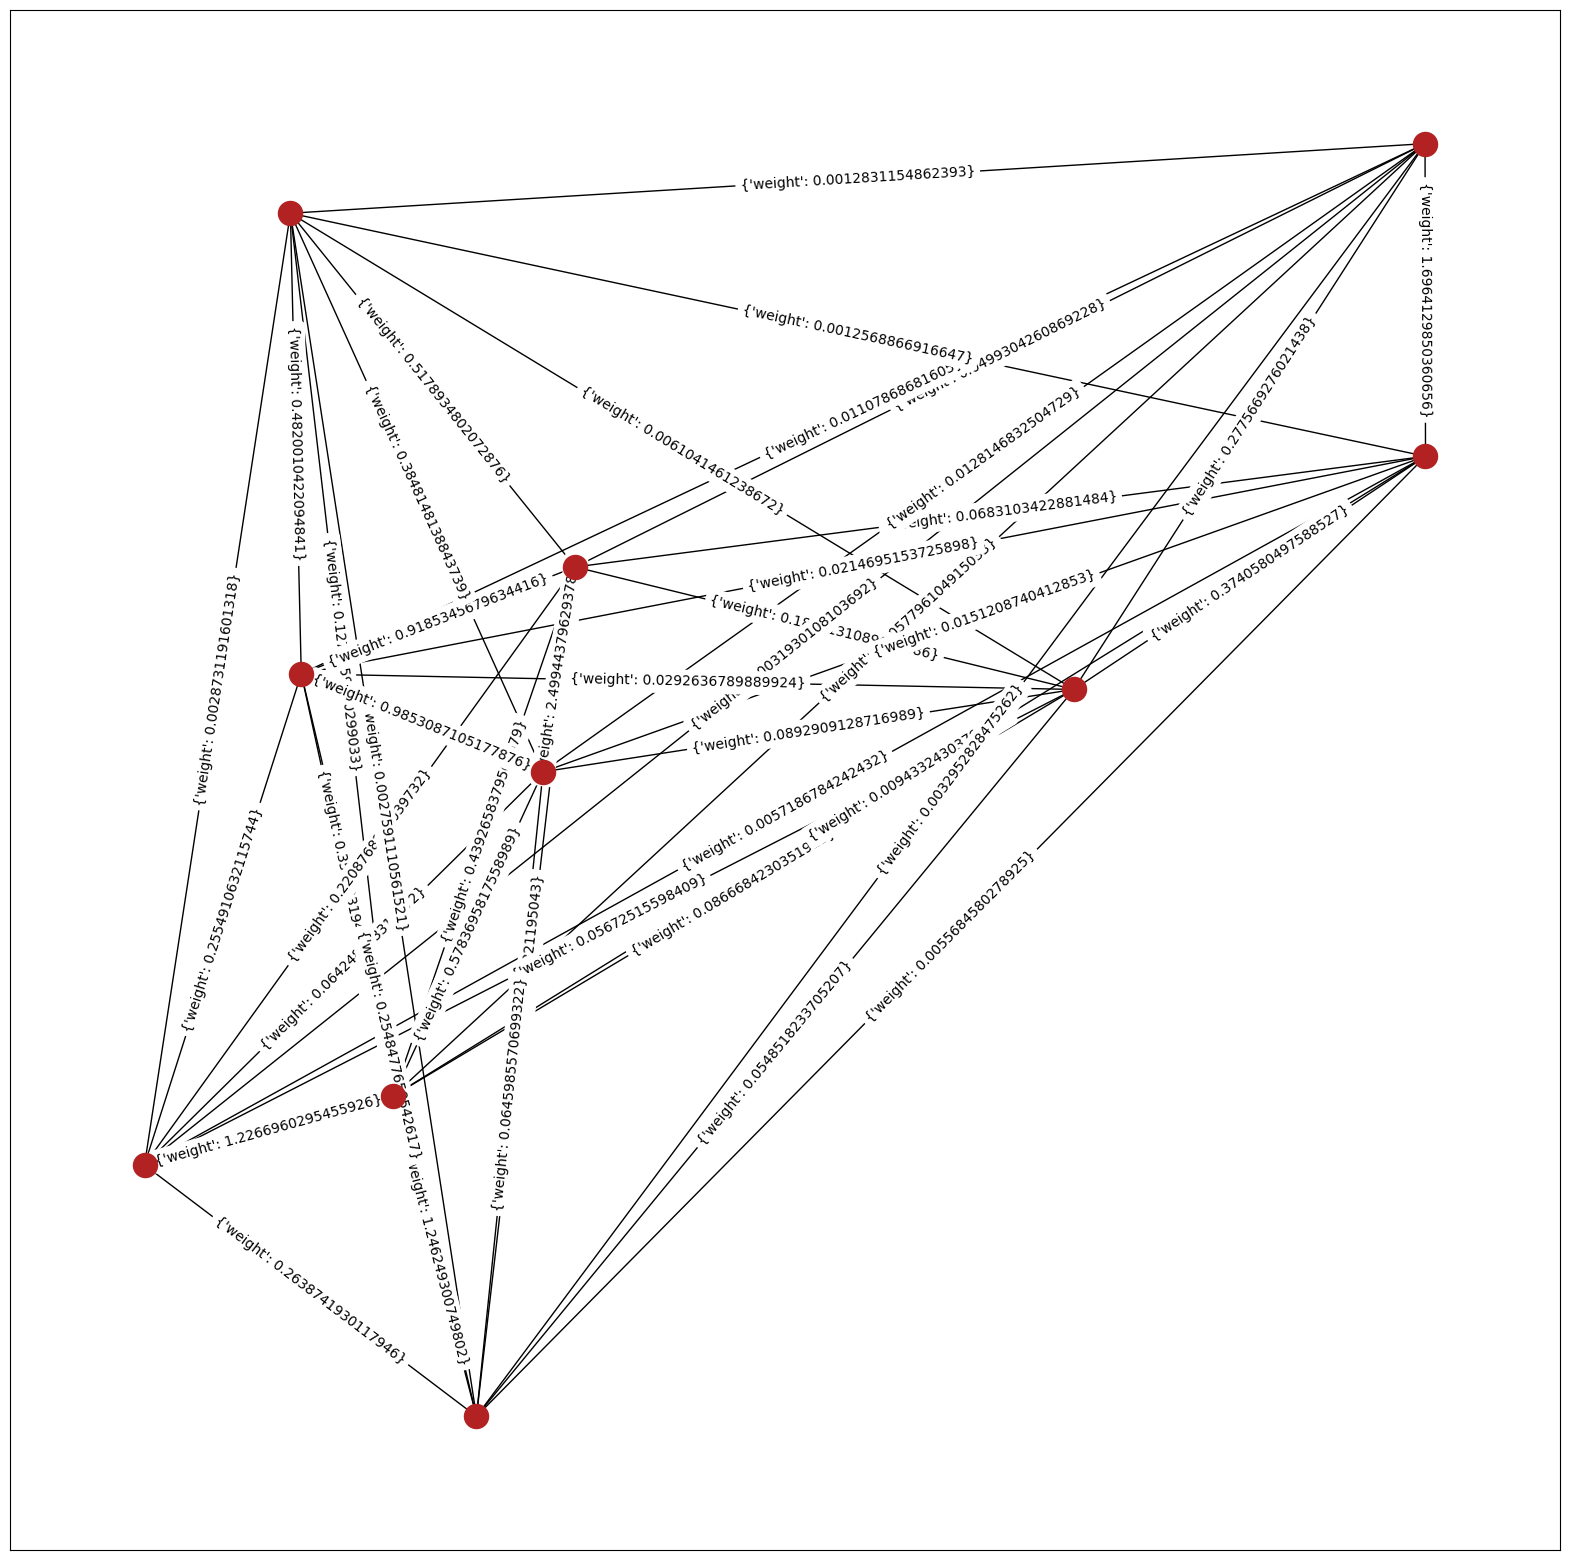

In [111]:
G = nx.Graph()
for i in range(10):
    for j in range(i + 1, 10):
        G.add_edge(hash_columns[i], hash_columns[j], weight = id_matrix_with[hash_columns[j]][i])
        
        # print(G.get_edge_data(hash_columns[i], hash_columns[j]))
# G.add_nodes_from(unic_list)

plt.figure(figsize=(cm_to_inch(15),cm_to_inch(15)))
# nx.draw_networkx(G, node_color = '#B22222')
pos = nx.spring_layout(G)
# print(pos)

nx.draw_networkx(G, pos, node_color = '#B22222', node_size = 300, arrows = True, with_labels = False)
nx.draw_networkx_edge_labels(G, pos)

plt.savefig("gggg_2.png")

In [9]:
df_top_1000_hashes = pd.read_csv('top1000hashes.csv', names = ['HASHES', 'COUNT'])['HASHES'].apply(crop)
top_1000_hashes = list(df_top_1000_hashes)

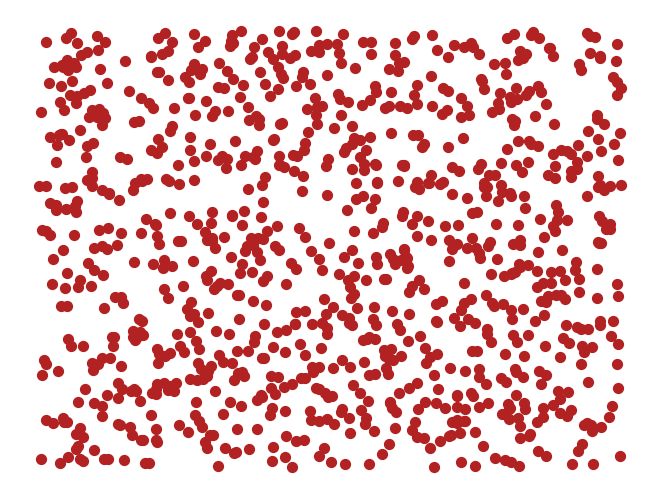

In [20]:
G = nx.cubical_graph()
G.add_nodes_from(top_1000_hashes)
G.clear_edges()
# nx.draw_networkx(G, node_color = '#B22222')
nx.draw_random(G, node_color = '#B22222', node_size = 50)
# plt.savefig("graph_3.png")